In [16]:
from pipeline import Dataset
import pandas as pd
from datatools import extract_market_data
import numpy as np
dataset = Dataset.load('../../data/parsed')
df = pd.concat([dataset.fundamental, extract_market_data(dataset.market)], axis=1).dropna()
df


turnoverRatio  transactionAmount    pe_ttm        pe      pb  \
day  asset                                                                 
1    0             3.6794            17229.0   34.4425   32.3029  4.9425   
     1             2.5150             3706.0   28.9934   27.2726  5.0552   
     2             1.2858             5136.0   42.9352   41.9279  4.8083   
     3             2.2007             3280.0   15.2245   13.8032  2.1904   
     4             0.8627             5291.0 -369.9850 -433.1736  3.0714   
...                   ...                ...       ...       ...     ...   
1000 49            0.3201             4603.0   40.4933   40.4933  2.7886   
     50            0.4137             2514.0   19.7194   19.7194  2.5400   
     51            1.1524             5514.0   13.8265   13.8265  1.3388   
     52            0.6358             7556.0   28.5368   28.5368  5.6946   
     53            1.0683             6467.0   10.6152   10.6152  1.9889   

                ps       pcf  avg_price  volatility  mean_volume  return_0  
day  asset                                                                  
1    0      3.8180 -578.7700  24.553713    0.861989    454075.84 -0.025231  
     1      3.0484   23.8260  16.169781    0.804576    176868.36 -0.011895  
     2      4.1392  -58.2185   9.059178    0.351893    361648.66 -0.018466  
     3      0.6691   61.0491   9.124460    0.250697    351809.54  0.002644  
     4      2.9370  -25.2279   5.054415    0.270981    338476.86 -0.023423  
...            ...       ...        ...         ...          ...       ...  
1000 49     1.0333   72.0836  13.844115    0.648996     93683.78 -0.007892  
     50     1.1739  -38.5837  11.271970    0.745284     71372.44  0.008574  
     51     0.6641   18.4961   3.576689    0.396658    391628.82 -0.026845  
     52     3.6566 -573.3135  28.328126    1.162008    109396.98  0.004291  
     53     0.4059  134.0916   9.935985    0.483320    208841.56 -0.003662  

[54000 rows x 11 columns]

In [18]:
df_price = df['avg_price']
df_pe = df['pe']
df_pe_ttm = df['pe_ttm']
"""get the rows with asset equal to 0"""
a = df_pe[df_pe.index.get_level_values('asset') == 0].to_numpy()
a

array([  32.3029,   31.2498,   23.3887,   23.9187,   25.9119,   25.5778,
         25.2091,   24.9441,   25.405 ,   25.3474,   25.0709,   25.6124,
         26.7645,   27.9397,   28.32  ,   28.6426,   28.5504,   28.1126,
         28.7462,   28.2278,   29.3338,   28.6426,   27.1908,   27.0411,
         27.3867,   26.753 ,   26.4189,   26.3498,   26.465 ,   26.8682,
         26.7761,   27.0411,   27.2254,   27.525 ,   27.3982,   27.3982,
         27.6863,   28.3084,   28.4352,   27.5365,   27.8706,   27.2139,
         27.2484,   27.6056,   27.8015,   27.6863,   28.1587,   28.0895,
         28.5158,   28.4582,   28.7693,   29.426 ,   29.6449,   30.5321,
         30.0136,   30.0021,   30.0597,   30.0136,   32.0068,  788.1967,
        867.0164,  927.0005,  921.7845,  909.324 ,  885.5622,  869.9142,
        882.9542,  895.7044,  868.755 ,  793.9923,  805.5834,  818.6234,
        853.3968,  872.2324,  882.3746,  890.1986,  869.9142,  879.1871,
        846.1523,  841.5159,  833.4021,  866.4368, 

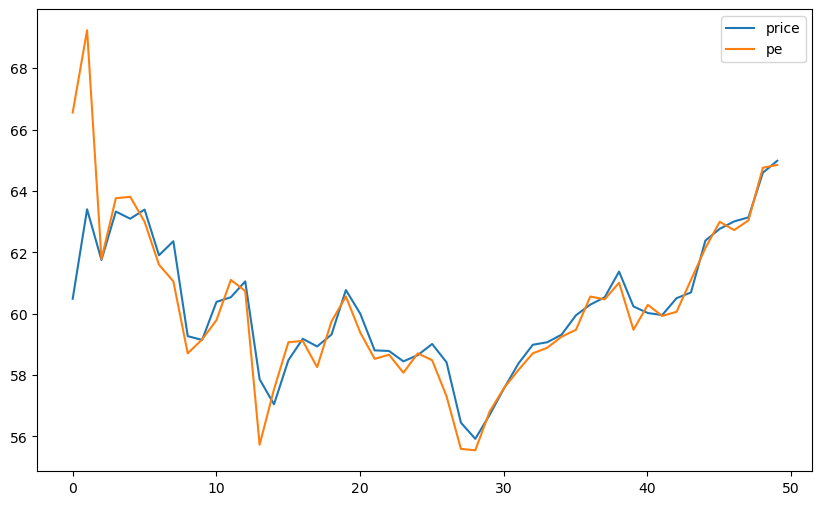

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_price_pe(df_price, df_pe, asset, start, end, m1, m2):
    a = df_price[df_price.index.get_level_values('asset') == asset].to_numpy()
    b = df_pe[df_pe.index.get_level_values('asset') == asset].to_numpy()
    x = np.linspace(0, len(a), len(a))
    plt.figure(figsize=(10, 6))
    """rescale the price and pe to make them comparable"""

    plt.plot(x[start:end], a[start:end] * m1, label='price')
    plt.plot(x[start:end], b[start:end] * m2, label='pe')
    plt.legend()
    plt.show()


    return None

plot_price_pe(df_price, df_pe, 12, 0, 50, 10, 5)

